# 1. Data gathering

In [378]:
# open the csv files inside every folder in the datasets folder

import os
import pandas as pd

for file in os.listdir('datasets'):
    print(file)

PH Spam + Marketing SMS (w timestamps)
Philippine Spam Scam SMS
SMS Spam Collection Dataset
SMS SPAM DATASET (10286 rows)
Spam Dataset


In [379]:
df1 = pd.read_csv('datasets/PH Spam + Marketing SMS (w timestamps)/text-messages.csv')
df2 = pd.read_csv('datasets/Philippine Spam Scam SMS/SPAM_SMS.csv')
df3 = pd.read_csv('datasets/SMS Spam Collection Dataset/spam.csv', encoding = "ISO-8859-1")
df4 = pd.read_csv('datasets/SMS SPAM DATASET (10286 rows)/combined_dataset.csv')
df5 = pd.read_csv('datasets/Spam Dataset/spam.csv')

In [380]:
# the columns of the datasets
print("dataset 1:")
print(df1.columns)
print("-----------------------------------------")
print("dataset 2:")
print(df2.columns)
print("-----------------------------------------")
print("dataset 3:")
print(df3.columns)
print("-----------------------------------------")
print("dataset 4:")
print(df4.columns)
print("-----------------------------------------")
print("dataset 5:")
print(df5.columns)

dataset 1:
Index(['date-received', 'date-read', 'sender', 'category', 'text'], dtype='object')
-----------------------------------------
dataset 2:
Index(['masked_celphone_number', 'hashed_celphone_number', 'date', 'text',
       'carrier'],
      dtype='object')
-----------------------------------------
dataset 3:
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
-----------------------------------------
dataset 4:
Index(['target', 'text'], dtype='object')
-----------------------------------------
dataset 5:
Index(['v1', 'v2'], dtype='object')


In [381]:
# the shape of the datasets
print("dataset 1: ", df1.shape)
print("dataset 2: ", df2.shape)
print("dataset 3: ", df3.shape)
print("dataset 4: ", df4.shape)
print("dataset 5: ", df5.shape)


dataset 1:  (4177, 5)
dataset 2:  (846, 5)
dataset 3:  (5572, 5)
dataset 4:  (10961, 2)
dataset 5:  (1000, 2)


In [382]:
df1.head()

,date-received,date-read,sender,category,text
0,2024-02-05 18:11:17,2024-02-05 18:11:24,+6390998***20,spam,"Make money while watching YouTube, earn 500P p..."
1,2023-03-28 16:28:37,2023-03-28 16:28:48,GCash,ads,Get up to P125K extra funds for emergencies wi...
2,2023-03-29 16:45:31,2023-03-29 16:45:38,GCash,notifs,<REDACTED>
3,2023-03-29 17:17:32,2023-03-29 17:17:43,GCash,notifs,<REDACTED>
4,2023-03-30 10:16:02,2023-03-30 10:16:03,GCash,OTP,<REDACTED>


In [383]:
df2.head()

,masked_celphone_number,hashed_celphone_number,date,text,carrier
0,+63998****809,6c8cee87-7025-3b11-b7f4-2445f62c2e8c,2018-01-23 04:46:26.719,"A new and ""Green"" township will be rising in t...",Smart
1,+63908****673,5a59adcb-ba3d-3b04-8dcc-3e39cc3f4974,2018-01-24 12:44:09.178,New OFFICE space for sale in Ortigas Avenue ne...,Smart
2,+63917****194,a14c754f-80b2-3797-8dde-0c3232e2d1df,2018-02-01 20:55:48.554,Celebrate the season of love with a sweet stay...,Globe PostPaid
3,+63920****952,132b9c54-4f79-33c3-b442-12d2318fb5d5,2018-02-28 10:37:26.541,Shangri-La Updates:\n\nRISEmakati\n\n-One-of-a...,Smart
4,+63907****270,28d44ab6-02a5-3eb6-8037-db43abbe8a47,2018-03-07 06:28:35.858,"Co in Makati needs Software Java Developer, kn...",TNT


In [384]:
df3.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [385]:
df4.head()

,target,text
0,spam,Congratulations! You've been selected for a lu...
1,spam,URGENT: Your account has been compromised. Cli...
2,spam,You've won a free iPhone! Claim your prize by ...
3,spam,Act now and receive a 50% discount on all purc...
4,spam,Important notice: Your subscription will expir...


In [386]:
df5.head()

,v1,v2
0,ham,SMS services. Your subscription is renewed
1,ham,SMS services. Your subscription is renewed
2,ham,Limited time offer! Get it now!
3,ham,Your chance to win a new iPhone! Click here now
4,ham,Congratulations! Thanks to a good friend


# 2. Data preprocessing

In [387]:
# cleaning the datasets


#keep only the text and category column
df1 = df1[['category', 'text']]

# changeing the column names to SMS and label
df1.columns = ['label', 'SMS']

df1

,label,SMS
0,spam,"Make money while watching YouTube, earn 500P p..."
1,ads,Get up to P125K extra funds for emergencies wi...
2,notifs,<REDACTED>
3,notifs,<REDACTED>
4,OTP,<REDACTED>
...,...,...
4172,gov,Pwede ng ma-access ang iba't ibang government ...
4173,gov,Pwede ng ma-access ang iba't ibang government ...
4174,gov,Pwede ng ma-access ang iba't ibang government ...
4175,gov,Pwede ng ma-access ang iba't ibang government ...


In [388]:
# Dataset 2
# Index(['masked_celphone_number', 'hashed_celphone_number', 'date', 'text','carrier'],dtype='object')

# keep only the text column
df2 = df2[['text']]

# add a label column with the value 1
df2['label'] = 1

# change the column names to SMS and label
df2.columns = ['SMS', 'label']

df2


,SMS,label
0,"A new and ""Green"" township will be rising in t...",1
1,New OFFICE space for sale in Ortigas Avenue ne...,1
2,Celebrate the season of love with a sweet stay...,1
3,Shangri-La Updates:\n\nRISEmakati\n\n-One-of-a...,1
4,"Co in Makati needs Software Java Developer, kn...",1
...,...,...
841,Your domestic parcel tracking code RR*-16PH i...,1
842,Your domestic parcel tracking code RR*-16PH i...,1
843,"Hi,<REAL NAME>! Gusto mo ba ng 18-888 raffle t...",1
844,fg.ss777b.fo New member download to get P2268 ...,1


In [389]:
# Dataset 3
# Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# keep only the v1 and v2 columns
df3 = df3[['v1', 'v2']]

# change the column names to label and SMS
df3.columns = ['label', 'SMS']

df3

,label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [390]:
# Dataset 4
# Index(['target', 'text'], dtype='object')

# change the column names to label and SMS
df4.columns = ['label', 'SMS']

df4

,label,SMS
0,spam,Congratulations! You've been selected for a lu...
1,spam,URGENT: Your account has been compromised. Cli...
2,spam,You've won a free iPhone! Claim your prize by ...
3,spam,Act now and receive a 50% discount on all purc...
4,spam,Important notice: Your subscription will expir...
...,...,...
10956,spam,Hey little one! Exciting news! Mama and baby a...
10957,spam,Amazing DATA deals on your Pulse Plan today! D...
10958,spam,Special offer just for you! Get 1GB @15 bob va...
10959,spam,NEW ARRIVAL - JUNE 23RD Dresses @ 300; Kondel...


In [391]:
# Dataset 5
# Index(['v1', 'v2'], dtype='object')

# change the column names to label and SMS
df5.columns = ['label', 'SMS']

df5

,label,SMS
0,ham,SMS services. Your subscription is renewed
1,ham,SMS services. Your subscription is renewed
2,ham,Limited time offer! Get it now!
3,ham,Your chance to win a new iPhone! Click here now
4,ham,Congratulations! Thanks to a good friend
...,...,...
995,spam,"Go until jurong point, crazy.. Available only"
996,spam,You won't believe it but it's true. It's Incre...
997,spam,WINNER!! As a valued network customer
998,spam,SMS services. Your subscription is renewed


In [392]:
# combine all the datasets
df = pd.concat([df3, df4, df5], axis = 0)

df

,label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
995,spam,"Go until jurong point, crazy.. Available only"
996,spam,You won't believe it but it's true. It's Incre...
997,spam,WINNER!! As a valued network customer
998,spam,SMS services. Your subscription is renewed


In [393]:
# get all the unique values in the label column
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [394]:
# for the values 'spam', 'ads', 'notifs', 'OTP', 'gov', 1, 'ham' change them to 1 or 0

df['label'] = df['label'].apply(lambda x: 1 if x in ['spam', 'ads', 'notifs', 'OTP', 'gov', 1] else 0)

In [395]:
# check for null values
df.isnull().sum()

label    0
SMS      0
dtype: int64

In [396]:
# drop the null values
df = df.dropna()

In [397]:
# check for empty strings

blanks = []
for index, text in df['SMS'].items():
    
    if text.isspace():
        blanks.append(index)
    

print('the number of empty strings is: ', len(blanks))

the number of empty strings is:  16


In [398]:
# drop the empty strings
df.drop(blanks, inplace=True)

In [399]:
# check if there are any duplicates
df.duplicated().sum()

6730

In [400]:
# delete the duplicated rows 
df = df.drop_duplicates()
df.shape

(10767, 2)

In [401]:
# reset the index
df.reset_index(drop=True, inplace=True)

<Axes: ylabel='count'>

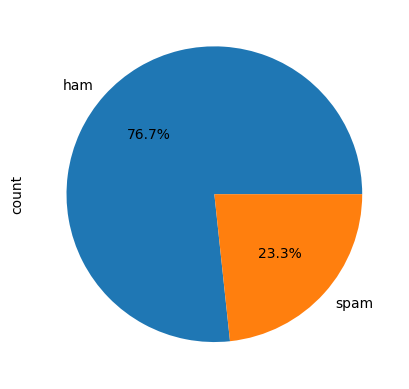

In [402]:
# number of spam and ham messages
df['label'].value_counts().plot(kind = 'pie', labels = ['ham', 'spam'], autopct = '%1.1f%%')


In [403]:
# remove 3 spam messages and 3 ham messages to use them for testing and delete them from the training set

df = df.sample(frac = 1).reset_index(drop = True)


df_test = df.groupby('label').head(3)

df = df.drop(df_test.index)

df_test


,label,SMS
0,0,"kerr mcgee : tomcat hey joe , here ' s the res..."
1,0,My sister cleared two round in birla soft yest...
2,0,"Notification Sir, this is to notify you that ..."
3,1,cailis for cheap ! new coalos softtabs = near ...
5,1,"vlc , 0 dln for sale , no prior pres . crip . ..."
16,1,note ! citibank account suspend in process dea...


In [404]:
len(df_test["SMS"][2])

82

In [405]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re

In [406]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [407]:
#creating list of stopwords containing stopwords from spacy and nltk

#stopwords of spacy
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print(len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
179
382


In [408]:
#text cleaning function
def clean_text(text):  
    string = ""
    
    #lower casing
    text=text.lower()
    
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    text=re.sub(r"n't"," not",text)
    
    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)

    #replace numbers with 'num'
    text=re.sub(r"\d","num",text)

    #replace URL with 'url'
    text=re.sub(r"http\S+","url",text)
    
    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string

In [409]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lemon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [410]:
#cleaning the data
df["SMS"]=df["SMS"].apply(clean_text)

In [411]:
df.shape

(10761, 2)

# 3. Feature-Extraction & Model building

In [412]:
#splitting the data 
from sklearn.model_selection import train_test_split

# since the data is imbalanced we will use stratify to make sure that the data is split in a way that the proportion of spam and ham messages is the same in both the training and testing set
X_train, X_test, y_train, y_test = train_test_split(df['SMS'], df['label'], test_size = 0.2, random_state = 42, stratify = df['label'])

In [413]:
# print the shape of the training and testing set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8608,)
(2153,)
(8608,)
(2153,)


<Axes: ylabel='count'>

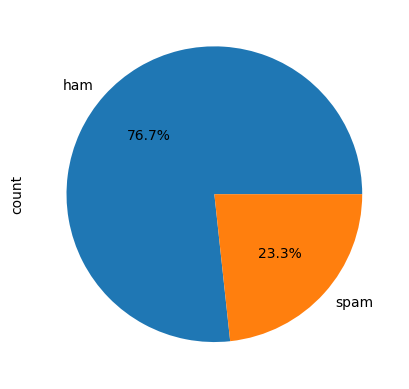

In [414]:
# destribution of ham and spam messages in the training set
y_train.value_counts().plot(kind = 'pie', labels = ['ham', 'spam'], autopct = '%1.1f%%')


<Axes: ylabel='count'>

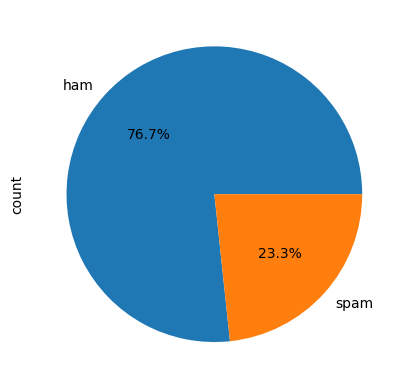

In [415]:
# destribution of ham and spam messages in the testing set
y_test.value_counts().plot(kind = 'pie', labels = ['ham', 'spam'], autopct = '%1.1f%%')

In [416]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [417]:
# create a pipeline
text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])

In [418]:

svc = text_clf.fit(X_train,y_train)

c:\Users\lemon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [419]:
#making prediction using the model
predictions=svc.predict(X_test)

# Evaluating the model

In [420]:
# the classification report
from sklearn import metrics
print("the classification report :")
print(metrics.classification_report(y_test,predictions))

the classification report :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1651
           1       0.96      0.91      0.93       502

    accuracy                           0.97      2153
   macro avg       0.96      0.95      0.96      2153
weighted avg       0.97      0.97      0.97      2153



In [421]:
# the models accuracy
svc_accuracy = metrics.accuracy_score(y_test,predictions)
print("linear svc accuracy : ",svc_accuracy)

linear svc accuracy :  0.9688806316767301


In [422]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1630   21]
 [  46  456]]


[Text(0, 0.5, 'ham'), Text(0, 1.5, 'spam')]

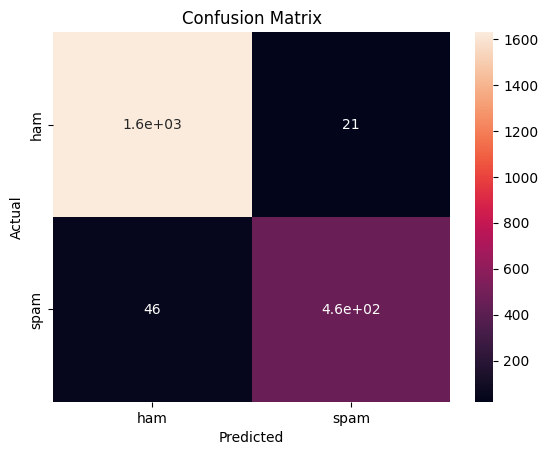

In [423]:
# plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])



In [424]:
# save the model
import joblib
joblib.dump(svc, 'models/linear_svc_model.pkl')

['models/linear_svc_model.pkl']

# trying other models

In [425]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
# create a pipeline
text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",RandomForestClassifier())])
rf = text_clf.fit(X_train,y_train)

the classification report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1651
           1       0.97      0.83      0.90       502

    accuracy                           0.96      2153
   macro avg       0.96      0.91      0.94      2153
weighted avg       0.96      0.96      0.95      2153

-----------------------------------------
random forest accuracy:  0.9558755225267069
-----------------------------------------


[Text(0, 0.5, 'ham'), Text(0, 1.5, 'spam')]

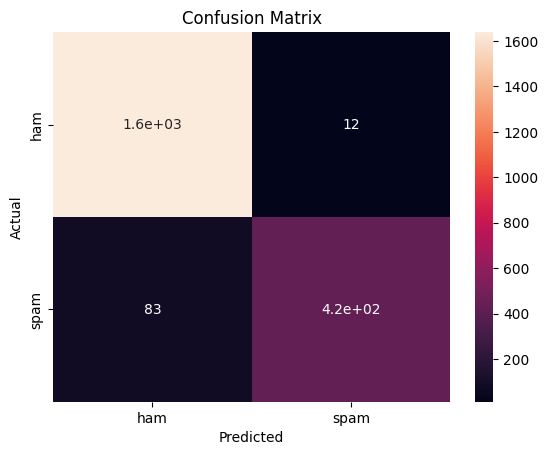

In [426]:
# making prediction using the model
predictions=rf.predict(X_test)

# the classification report
print("the classification report: ")
print(metrics.classification_report(y_test,predictions))
print("-----------------------------------------")

# the models accuracy
rf_accuracy = metrics.accuracy_score(y_test,predictions)
print("random forest accuracy: ", rf_accuracy )
print("-----------------------------------------")

# plotting the confusion matrix
cm = confusion_matrix(y_test, predictions)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])


In [427]:
# save the model
joblib.dump(rf, 'models/random_forest_model.pkl')

['models/random_forest_model.pkl']

In [428]:
# naive bayes model
from sklearn.naive_bayes import MultinomialNB
# create a pipeline
text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",MultinomialNB())])
nb = text_clf.fit(X_train,y_train)

the classification report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1651
           1       0.99      0.63      0.77       502

    accuracy                           0.91      2153
   macro avg       0.95      0.82      0.86      2153
weighted avg       0.92      0.91      0.91      2153

-----------------------------------------
naive bayes accuracy:  0.913144449605202
-----------------------------------------


[Text(0, 0.5, 'ham'), Text(0, 1.5, 'spam')]

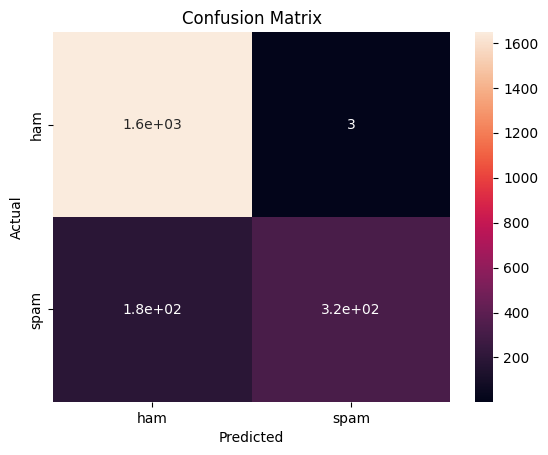

In [429]:
# making prediction using the model
predictions=nb.predict(X_test)

# the classification report
print("the classification report: ")
print(metrics.classification_report(y_test,predictions))
print("-----------------------------------------")

# the models accuracy
nb_accuracy = metrics.accuracy_score(y_test,predictions)
print("naive bayes accuracy: ", nb_accuracy )
print("-----------------------------------------")

# plotting the confusion matrix
cm = confusion_matrix(y_test, predictions)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])


In [430]:
# save the model
joblib.dump(nb, 'models/naive_bayes_model.pkl')

['models/naive_bayes_model.pkl']

In [431]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
# create a pipeline
text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LogisticRegression())])
lr = text_clf.fit(X_train,y_train)

the classification report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1651
           1       0.97      0.78      0.86       502

    accuracy                           0.94      2153
   macro avg       0.95      0.88      0.91      2153
weighted avg       0.94      0.94      0.94      2153

-----------------------------------------
logistic regression accuracy:  0.9414770088248955
-----------------------------------------


[Text(0, 0.5, 'ham'), Text(0, 1.5, 'spam')]

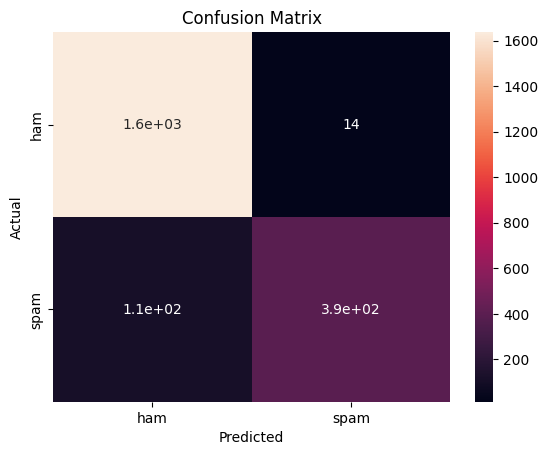

In [432]:
# making prediction using the model
predictions=lr.predict(X_test)

# the classification report
print("the classification report: ")
print(metrics.classification_report(y_test,predictions))
print("-----------------------------------------")

# the models accuracy
lr_accuracy = metrics.accuracy_score(y_test,predictions)
print("logistic regression accuracy: ", lr_accuracy )
print("-----------------------------------------")

# plotting the confusion matrix
cm = confusion_matrix(y_test, predictions)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])


In [433]:
# save the model
joblib.dump(lr, 'models/logistic_regression_model.pkl')

['models/logistic_regression_model.pkl']

# Testing the model

In [434]:
# choose the best model
models = [svc_accuracy, rf_accuracy, nb_accuracy, lr_accuracy]

# the best model
best_model = max(models)

if best_model == svc_accuracy:
    print("the best model is the linear svc model")
    joblib.dump(svc, 'models/linear_svc_model.pkl')
elif best_model == rf_accuracy:
    print("the best model is the random forest model")
    joblib.dump(rf, 'models/random_forest_model.pkl')
elif best_model == nb_accuracy:
    print("the best model is the naive bayes model")
    joblib.dump(nb, 'models/naive_bayes_model.pkl')
else:
    print("the best model is the logistic regression model")
    joblib.dump(lr, 'models/logistic_regression_model.pkl')

the best model is the linear svc model


In [435]:
# test the model

def predict_spam(sms):
    sms = clean_text(sms)
    return model.predict([sms])[0]

In [436]:

spam = "Congratulations! you have won a free trip to the Bahamas. Text 'WIN' to 12345 to claim your prize"
ham = "hey there it's been a while !"

sms = spam

if model.predict([sms])[0] == 1:
    print("This is a spam message")
else:
    print("This is not a spam message")

This is a spam message


In [437]:
# test it using the df_test dataframe
df_test['prediction'] = df_test['SMS'].apply(predict_spam)

for index, row in df_test.iterrows():
    print("SMS: ", row['SMS'])
    print("Actual: ", row['label'])
    print("Prediction: ", row['prediction'])
    print("\n")

SMS:  kerr mcgee : tomcat hey joe , here ' s the response i got with regards to tomcat . i ' ve place another call into david and let him know that the information we received included most points except for tomcat . i ' ll keep you informed . what i know is that the gas is sourced at mi 587 and moved on km ' s firm contract . for as long as ces remembers , they sell the gas to entex . entex chooses the pipe off which they take - - usually midcon - - also , hpl channel , or tejas . km is invoiced directly . volume is approx . 2395 . the deal with entex is written up monthly . km pays on a basket of indices . entex pays on the highest index . ami - - - - - - - - - - - - - - - - - - - - - - forwarded by ami chokshi / corp / enron on 12 / 21 / 99 09 : 32 am - - - - - - - - - - - - - - - - - - - - - - - - - - - dscottl @ . com on 12 / 21 / 99 09 : 18 : 12 am to : ami chokshi / corp / enron @ enron cc : subject : re : the response i got from our risk desk was that your structuring group has

# Streamlit Interface

In [452]:
%%writefile App.py

import streamlit as st
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re

nlp=spacy.load("en_core_web_sm")

def init_page() -> None:
    st.set_page_config(page_title="AI Project Dashboard", layout="wide")

def add_pages() -> None:
    pages = {
        "Home": home_page,
        "SMS Spam Detector": sms_spam_page,
        "Data preprocessing": data_preprocessing_page,
        "Model Training": model_training_page,
        "Model Testing": model_testing_page
    }

    st.sidebar.title("Navigation")
    page = st.sidebar.selectbox("Go to", list(pages.keys()))
    
    pages[page]()

def home_page() -> None:
    st.title("Welcome to the AI Projects Dashboard")
    st.write("This dashboard contains multiple AI projects. You can navigate through the different pages using the buttons below.")
    st.write("### Available Pages:")
    st.write("- **Home**: Overview of the dashboard")
    st.write("- **SMS Spam Detector**: Detect if an SMS is spam or not using different models")
    st.write("- **Data preprocessing**: Understand the data cleaning process")
    st.write("- **Model Training**: Learn about the model training process")
    st.write("- **Model Testing**: See how the models were tested and their performance metrics")


def sms_spam_page() -> None:
    st.title("SMS Spam Detector")
    st.write("Enter the SMS text below to check if it's spam or not:")
    
    input_text = st.text_area("SMS Text")
    model_option = st.selectbox("Choose a model:", ["Logistic Regression", "Naive Bayes", "Random Forest" , "Linear SVC"])

    if st.button("Check SMS"):
        if input_text:
            # Load the selected model
            model_path = f'models/{model_option.lower().replace(" ", "_")}_model.pkl'
            model = joblib.load(model_path)
            tfidf_vectorizer = TfidfVectorizer()
            processed_text = preprocess_text(input_text)
            X = processed_text

            prediction = model.predict(X)

            if prediction == 1:
                st.error("The SMS is likely Spam.")
            else:
                st.success("The SMS is likely Not Spam.")
        else:
            st.warning("Please enter some text to check.")

def data_preprocessing_page() -> None:
    st.title("Data Preprocessing")
    st.write("This page describes the data cleaning process used in the project.")
    st.write("### Steps Involved:")
    st.write("1. **Handling Missing Values**: Techniques to manage or impute missing data.")
    st.write("2. **Text Preprocessing**: Steps to clean and preprocess text data, such as removing punctuation, converting to lowercase, and tokenization.")
    st.write("3. **Feature Selection**: Methods used to select the most relevant features for model training.")

def model_training_page() -> None:
    st.title("Model Training")
    st.write("This page describes the model training process.")
    st.write("### Steps Involved:")
    st.write("1. **Data Splitting**: Splitting the data into training and validation sets.")
    st.write("2. **Model Selection**: Choosing different models to train.")
    st.write("3. **Training Process**: The process of training the models using the training data.")
    st.write("### Training Metrics:")
    st.write("Include metrics like accuracy, precision, recall, and F1-score for each model.")

def model_testing_page() -> None:
    st.title("Model Testing")
    st.write("This page describes the model testing process.")
    st.write("### Steps Involved:")
    st.write("1. **Test Data Preparation**: Preparing the test data for evaluation.")
    st.write("2. **Model Evaluation**: Evaluating the trained models using the test data.")
    st.write("### Testing Metrics:")
    st.write("Include metrics like accuracy, precision, recall, and F1-score, along with any relevant graphs or confusion matrices.")

def load_models():
    logistic_model = joblib.load('models/logistic_model.pkl')
    naive_bayes_model = joblib.load('models/naive_bayes_model.pkl')
    random_forest_model = joblib.load('models/random_forest_model.pkl')
    tfidf_vectorizer = TfidfVectorizer()
    return logistic_model, naive_bayes_model, random_forest_model, tfidf_vectorizer

def preprocess_text(text , lemma=WordNetLemmatizer() , Stopwords=set((set(nlp.Defaults.stop_words)|set(stopwords.words('english'))))):
    
    string = ""
    
    #lower casing
    text=text.lower()
    
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    text=re.sub(r"n't"," not",text)
    
    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)

    #replace numbers with 'num'
    text=re.sub(r"\d","num",text)

    #replace URL with 'url'
    text=re.sub(r"http\S+","url",text)
    
    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string

def main() -> None:
    init_page()
    add_pages()

if __name__ == "__main__":
    main()


Overwriting App.py


In [453]:
# run the app
!streamlit run App.py

^C
